In [5]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('./new-york-city-transport-statistics'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./new-york-city-transport-statistics\mta_1706.csv
./new-york-city-transport-statistics\mta_1708.csv
./new-york-city-transport-statistics\mta_1710.csv
./new-york-city-transport-statistics\mta_1712.csv


In [13]:
import pandas as pd
import os

folder_path = './new-york-city-transport-statistics'
csv_files = [os.path.join(folder_path, filename) for filename in os.listdir(folder_path) if filename.endswith('.csv')]

df_list = []
for file in csv_files:
    try:
        df = pd.read_csv(file, on_bad_lines='skip', low_memory=False)  
        df_list.append(df)
        print(f"Loaded {file} with {df.shape[0]} rows and {df.shape[1]} columns")
    except Exception as e:
        print(f"Error reading {file}: {e}")

merged_df = pd.concat(df_list, ignore_index=True)

merged_df.to_csv('full.csv', index=False)
print("full.csv'.")


Loaded ./new-york-city-transport-statistics\mta_1706.csv with 6730436 rows and 17 columns
Loaded ./new-york-city-transport-statistics\mta_1708.csv with 6463520 rows and 17 columns
Loaded ./new-york-city-transport-statistics\mta_1710.csv with 6865376 rows and 17 columns
Loaded ./new-york-city-transport-statistics\mta_1712.csv with 6461384 rows and 17 columns
full.csv'.


In [6]:
import numpy as np 
import pandas as pd 

df = pd.read_csv('full.csv')

In [8]:
columns_needed = [
    "RecordedAtTime", "DirectionRef", "PublishedLineName", "DestinationName",
    "NextStopPointName", "DistanceFromStop", "ExpectedArrivalTime", "ScheduledArrivalTime"
]

df = df[df["ArrivalProximityText"] == "at stop"]

df = df[columns_needed]

In [9]:
df.head()

,RecordedAtTime,DirectionRef,PublishedLineName,DestinationName,NextStopPointName,DistanceFromStop,ExpectedArrivalTime,ScheduledArrivalTime
2,2017-06-01 00:03:49,0.0,Bx10,RIVERDALE 263 ST,HENRY HUDSON PKY E/W 235 ST,5.0,2017-06-01 00:03:56,24:00:53
4,2017-06-01 00:03:22,1.0,Bx1,MOTT HAVEN 136 ST via CONCOURSE,GRAND CONCOURSE/E 196 ST,11.0,2017-06-01 00:03:56,23:59:38
6,2017-06-01 00:03:24,0.0,B31,MIDWOOD KINGS HWY STA,GERRITSEN AV/GERRITSEN BEACH,0.0,NaN,24:08:00
11,2017-06-01 00:03:52,1.0,B1,MANHATTAN BEACH KINGSBORO CC,86 ST/BAY PY,22.0,2017-06-01 00:03:57,24:05:55
20,2017-06-01 00:03:41,0.0,B6,EAST NY NEW LOTS STA,GLENWOOD RD/E 98 ST,4.0,2017-06-01 00:03:56,24:05:00


In [10]:
df = df.dropna()

In [11]:
df.head()

,RecordedAtTime,DirectionRef,PublishedLineName,DestinationName,NextStopPointName,DistanceFromStop,ExpectedArrivalTime,ScheduledArrivalTime
2,2017-06-01 00:03:49,0.0,Bx10,RIVERDALE 263 ST,HENRY HUDSON PKY E/W 235 ST,5.0,2017-06-01 00:03:56,24:00:53
4,2017-06-01 00:03:22,1.0,Bx1,MOTT HAVEN 136 ST via CONCOURSE,GRAND CONCOURSE/E 196 ST,11.0,2017-06-01 00:03:56,23:59:38
11,2017-06-01 00:03:52,1.0,B1,MANHATTAN BEACH KINGSBORO CC,86 ST/BAY PY,22.0,2017-06-01 00:03:57,24:05:55
20,2017-06-01 00:03:41,0.0,B6,EAST NY NEW LOTS STA,GLENWOOD RD/E 98 ST,4.0,2017-06-01 00:03:56,24:05:00
21,2017-06-01 00:03:36,0.0,B4,SHEEPSHEAD BAY KNAPP ST,SHORE PKY/BROWN ST,25.0,2017-06-01 00:03:56,24:01:49


In [12]:
import pandas as pd

def parse_scheduled_time(row):
    rec_time = row['RecordedAtTime']
    base_date = rec_time.date()
    scheduled_str = row['ScheduledArrivalTime']
    
    hour, minute, second = map(int, scheduled_str.split(':'))
    
    if hour >= 24:
        hour -= 24
    scheduled_dt = pd.Timestamp(base_date) + pd.Timedelta(hours=hour, minutes=minute, seconds=second)
    
    diff = scheduled_dt - rec_time
    if diff.total_seconds() > 12 * 3600:
        scheduled_dt -= pd.Timedelta(days=1)
    
    return scheduled_dt

# Convert RecordedAtTime and ExpectedArrivalTime to datetime
df['RecordedAtTime'] = pd.to_datetime(df['RecordedAtTime'], errors='coerce')
df['ExpectedArrivalTime'] = pd.to_datetime(df['ExpectedArrivalTime'], errors='coerce')

# Parse ScheduledArrivalTime
df['ScheduledArrivalTime_dt'] = df.apply(parse_scheduled_time, axis=1)

# Compute Delay in minutes
df['Delay'] = (df['ExpectedArrivalTime'] - df['ScheduledArrivalTime_dt']).dt.total_seconds() / 60  

print("Delay calculation complete.")


Delay calculation complete.


In [13]:
df = df.drop(columns=['ExpectedArrivalTime', 'ScheduledArrivalTime', 'ScheduledArrivalTime_dt'])


In [14]:
df.head()

,RecordedAtTime,DirectionRef,PublishedLineName,DestinationName,NextStopPointName,DistanceFromStop,Delay
2,2017-06-01 00:03:49,0.0,Bx10,RIVERDALE 263 ST,HENRY HUDSON PKY E/W 235 ST,5.0,3.050000
4,2017-06-01 00:03:22,1.0,Bx1,MOTT HAVEN 136 ST via CONCOURSE,GRAND CONCOURSE/E 196 ST,11.0,4.300000
11,2017-06-01 00:03:52,1.0,B1,MANHATTAN BEACH KINGSBORO CC,86 ST/BAY PY,22.0,-1.966667
20,2017-06-01 00:03:41,0.0,B6,EAST NY NEW LOTS STA,GLENWOOD RD/E 98 ST,4.0,-1.066667
21,2017-06-01 00:03:36,0.0,B4,SHEEPSHEAD BAY KNAPP ST,SHORE PKY/BROWN ST,25.0,2.116667


In [15]:
import pandas as pd

df['Day'] = df['RecordedAtTime'].dt.day_name()
df['DayType'] = df['RecordedAtTime'].dt.weekday.apply(lambda x: 'weekend' if x >= 5 else 'workday')

# Define rush hour periods
def rush_hour_status(time):
    hour = time.hour
    return 1 if (6 <= hour < 10) or (15 <= hour < 19) else 0

df['RushHour'] = df['RecordedAtTime'].dt.time.apply(rush_hour_status)

# Define far status based on distance threshold (200 meters)
df['FarStatus'] = df['DistanceFromStop'].apply(lambda x: 1 if x > 200 else 0)

print("New features added: Day, DayType, RushHour, and FarStatus.")


New features added: Day, DayType, RushHour, and FarStatus.


In [18]:
rush_hour_counts = df['RushHour'].value_counts(normalize=True) * 100
print("Rush Hour Distribution:\n", rush_hour_counts)


Rush Hour Distribution:
 RushHour
0    52.91126
1    47.08874
Name: proportion, dtype: float64


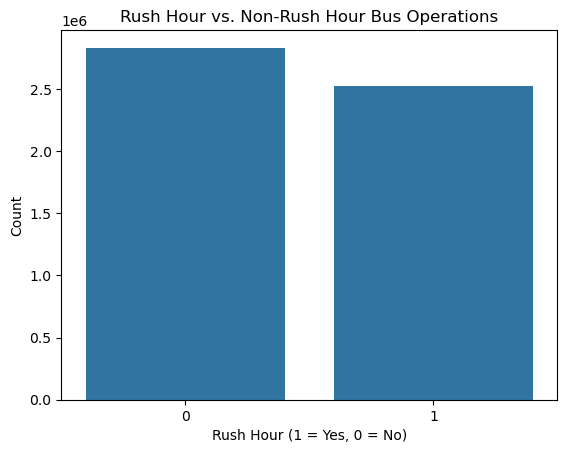

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=df['RushHour'])
plt.title('Rush Hour vs. Non-Rush Hour Bus Operations')
plt.xlabel('Rush Hour (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()


In [20]:
daytype_counts = df['DayType'].value_counts(normalize=True) * 100
print("Workday vs. Weekend Distribution:\n", daytype_counts)


Workday vs. Weekend Distribution:
 DayType
workday    77.132749
weekend    22.867251
Name: proportion, dtype: float64


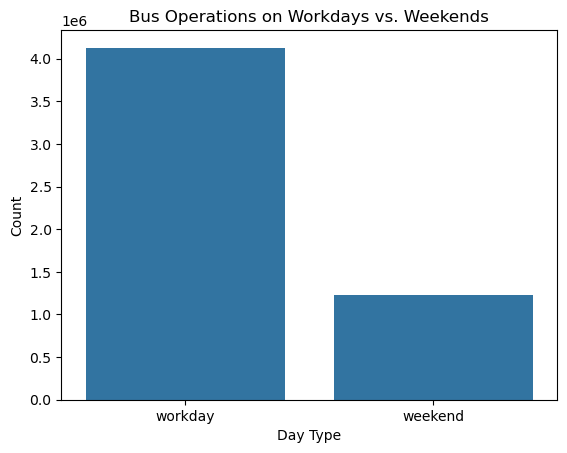

In [21]:
sns.countplot(x=df['DayType'])
plt.title('Bus Operations on Workdays vs. Weekends')
plt.xlabel('Day Type')
plt.ylabel('Count')
plt.show()


In [22]:
df.head()

,RecordedAtTime,DirectionRef,PublishedLineName,DestinationName,NextStopPointName,DistanceFromStop,Delay,Day,DayType,RushHour,FarStatus
2,2017-06-01 00:03:49,0.0,Bx10,RIVERDALE 263 ST,HENRY HUDSON PKY E/W 235 ST,5.0,3.050000,Thursday,workday,0,0
4,2017-06-01 00:03:22,1.0,Bx1,MOTT HAVEN 136 ST via CONCOURSE,GRAND CONCOURSE/E 196 ST,11.0,4.300000,Thursday,workday,0,0
11,2017-06-01 00:03:52,1.0,B1,MANHATTAN BEACH KINGSBORO CC,86 ST/BAY PY,22.0,-1.966667,Thursday,workday,0,0
20,2017-06-01 00:03:41,0.0,B6,EAST NY NEW LOTS STA,GLENWOOD RD/E 98 ST,4.0,-1.066667,Thursday,workday,0,0
21,2017-06-01 00:03:36,0.0,B4,SHEEPSHEAD BAY KNAPP ST,SHORE PKY/BROWN ST,25.0,2.116667,Thursday,workday,0,0


In [25]:
df = df.drop(columns=['Day'])

In [26]:
df = df.drop(columns=['FarStatus'])

In [27]:
df.head()

,RecordedAtTime,DirectionRef,PublishedLineName,DestinationName,NextStopPointName,DistanceFromStop,Delay,DayType,RushHour
2,2017-06-01 00:03:49,0.0,Bx10,RIVERDALE 263 ST,HENRY HUDSON PKY E/W 235 ST,5.0,3.050000,workday,0
4,2017-06-01 00:03:22,1.0,Bx1,MOTT HAVEN 136 ST via CONCOURSE,GRAND CONCOURSE/E 196 ST,11.0,4.300000,workday,0
11,2017-06-01 00:03:52,1.0,B1,MANHATTAN BEACH KINGSBORO CC,86 ST/BAY PY,22.0,-1.966667,workday,0
20,2017-06-01 00:03:41,0.0,B6,EAST NY NEW LOTS STA,GLENWOOD RD/E 98 ST,4.0,-1.066667,workday,0
21,2017-06-01 00:03:36,0.0,B4,SHEEPSHEAD BAY KNAPP ST,SHORE PKY/BROWN ST,25.0,2.116667,workday,0


In [28]:
from sklearn.model_selection import train_test_split

df_sampled, _ = train_test_split(df, test_size=0.9, stratify=df['DayType'], random_state=42)


In [38]:
df_sampled.shape

(535319, 9)

In [144]:
for col in ['PublishedLineName', 'DestinationName', 'NextStopPointName']:
    freq_map = df[col].value_counts(normalize=True)  # Get frequency of each category
    df[col] = df[col].map(freq_map)


In [146]:
df.head()

,RecordedAtTime,DirectionRef,PublishedLineName,DestinationName,NextStopPointName,DistanceFromStop,Delay,DayType,RushHour
2,2017-06-01 00:03:49,0.0,0.005259,0.005753,0.000144,5.0,3.050000,0,0
4,2017-06-01 00:03:22,1.0,0.004949,0.004539,0.000182,11.0,4.300000,0,0
11,2017-06-01 00:03:52,1.0,0.008690,0.004006,0.000426,22.0,-1.966667,0,0
20,2017-06-01 00:03:41,0.0,0.021032,0.001514,0.000311,4.0,-1.066667,0,0
21,2017-06-01 00:03:36,0.0,0.004922,0.002494,0.000017,25.0,2.116667,0,0


In [149]:
df.to_csv("busbus.csv", index=False)


In [151]:
bus_sample = pd.read_csv("busbus.csv")
nyc_weather = pd.read_csv("NYC_Weather_2016_2022.csv", on_bad_lines='skip')

bus_sample['RecordedAtTime'] = pd.to_datetime(bus_sample['RecordedAtTime'], errors='coerce')
nyc_weather.rename(columns={'time': 'WeatherDatetime'}, inplace=True)
nyc_weather['WeatherDatetime'] = pd.to_datetime(nyc_weather['WeatherDatetime'], errors='coerce')

bus_sample['RoundedDatetime'] = bus_sample['RecordedAtTime'].dt.floor('H')

merged_data = pd.merge(bus_sample, nyc_weather, left_on='RoundedDatetime', right_on='WeatherDatetime', how='left')

merged_data.drop(columns=['RoundedDatetime', 'WeatherDatetime'], inplace=True)

merged_data.to_csv("for_modeling.csv", index=False)

print("Merged bus and weather data saved as 'data_for_modeling.csv'.")
print(merged_data.head())


C:\Users\User\AppData\Local\Temp\ipykernel_25052\963731363.py:8: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  bus_sample['RoundedDatetime'] = bus_sample['RecordedAtTime'].dt.floor('H')


Merged bus and weather data saved as 'data_for_modeling.csv'.
       RecordedAtTime  DirectionRef  PublishedLineName  DestinationName  \
0 2017-06-01 00:03:49           0.0           0.005259         0.005753   
1 2017-06-01 00:03:22           1.0           0.004949         0.004539   
2 2017-06-01 00:03:52           1.0           0.008690         0.004006   
3 2017-06-01 00:03:41           0.0           0.021032         0.001514   
4 2017-06-01 00:03:36           0.0           0.004922         0.002494   

   NextStopPointName  DistanceFromStop     Delay  DayType  RushHour  \
0           0.000144               5.0  3.050000        0         0   
1           0.000182              11.0  4.300000        0         0   
2           0.000426              22.0 -1.966667        0         0   
3           0.000311               4.0 -1.066667        0         0   
4           0.000017              25.0  2.116667        0         0   

   temperature_2m (°C)  precipitation (mm)  rain (mm)  cloud

In [3]:
import pandas as pd 
df = pd.read_csv("for_modeling.csv")

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_cols = ['DistanceFromStop', 'temperature_2m (°C)', 'Delay','precipitation (mm)', 'rain (mm)', 
            'cloudcover (%)', 'cloudcover_low (%)', 'cloudcover_mid (%)', 'cloudcover_high (%)', 
            'windspeed_10m (km/h)', 'winddirection_10m (°)']
df[num_cols] = scaler.fit_transform(df[num_cols])


In [5]:
df.head()

,RecordedAtTime,DirectionRef,PublishedLineName,DestinationName,NextStopPointName,DistanceFromStop,Delay,DayType,RushHour,temperature_2m (°C),precipitation (mm),rain (mm),cloudcover (%),cloudcover_low (%),cloudcover_mid (%),cloudcover_high (%),windspeed_10m (km/h),winddirection_10m (°)
0,2017-06-01 00:03:49,0.0,0.005259,0.005753,0.000144,-0.736143,-0.148962,0,0,0.483536,-0.209168,-0.20352,-0.664042,-0.634918,-0.215041,-0.554477,-0.761011,-0.18201
1,2017-06-01 00:03:22,1.0,0.004949,0.004539,0.000182,-0.020100,-0.090573,0,0,0.483536,-0.209168,-0.20352,-0.664042,-0.634918,-0.215041,-0.554477,-0.761011,-0.18201
2,2017-06-01 00:03:52,1.0,0.008690,0.004006,0.000426,1.292647,-0.383295,0,0,0.483536,-0.209168,-0.20352,-0.664042,-0.634918,-0.215041,-0.554477,-0.761011,-0.18201
3,2017-06-01 00:03:41,0.0,0.021032,0.001514,0.000311,-0.855484,-0.341255,0,0,0.483536,-0.209168,-0.20352,-0.664042,-0.634918,-0.215041,-0.554477,-0.761011,-0.18201
4,2017-06-01 00:03:36,0.0,0.004922,0.002494,0.000017,1.650668,-0.192559,0,0,0.483536,-0.209168,-0.20352,-0.664042,-0.634918,-0.215041,-0.554477,-0.761011,-0.18201


In [6]:
df.drop(columns=['RecordedAtTime'], inplace=True)


In [7]:
df.head()

,DirectionRef,PublishedLineName,DestinationName,NextStopPointName,DistanceFromStop,Delay,DayType,RushHour,temperature_2m (°C),precipitation (mm),rain (mm),cloudcover (%),cloudcover_low (%),cloudcover_mid (%),cloudcover_high (%),windspeed_10m (km/h),winddirection_10m (°)
0,0.0,0.005259,0.005753,0.000144,-0.736143,-0.148962,0,0,0.483536,-0.209168,-0.20352,-0.664042,-0.634918,-0.215041,-0.554477,-0.761011,-0.18201
1,1.0,0.004949,0.004539,0.000182,-0.020100,-0.090573,0,0,0.483536,-0.209168,-0.20352,-0.664042,-0.634918,-0.215041,-0.554477,-0.761011,-0.18201
2,1.0,0.008690,0.004006,0.000426,1.292647,-0.383295,0,0,0.483536,-0.209168,-0.20352,-0.664042,-0.634918,-0.215041,-0.554477,-0.761011,-0.18201
3,0.0,0.021032,0.001514,0.000311,-0.855484,-0.341255,0,0,0.483536,-0.209168,-0.20352,-0.664042,-0.634918,-0.215041,-0.554477,-0.761011,-0.18201
4,0.0,0.004922,0.002494,0.000017,1.650668,-0.192559,0,0,0.483536,-0.209168,-0.20352,-0.664042,-0.634918,-0.215041,-0.554477,-0.761011,-0.18201


In [8]:
df = df.drop_duplicates()


In [9]:
df.shape

(5345919, 17)

In [10]:
df_filtered = df[df['Delay'] > 0]

print(df_filtered.shape)


(1844555, 17)


In [11]:
df_sampled = df_filtered.groupby('PublishedLineName').apply(lambda x: x.sample(frac=0.3, random_state=42)).reset_index(drop=True)


C:\Users\User\AppData\Local\Temp\ipykernel_11588\2310368640.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_sampled = df_filtered.groupby('PublishedLineName').apply(lambda x: x.sample(frac=0.3, random_state=42)).reset_index(drop=True)


In [12]:
df_sampled.shape

(553364, 17)

In [13]:
df_sampled.head()

,DirectionRef,PublishedLineName,DestinationName,NextStopPointName,DistanceFromStop,Delay,DayType,RushHour,temperature_2m (°C),precipitation (mm),rain (mm),cloudcover (%),cloudcover_low (%),cloudcover_mid (%),cloudcover_high (%),windspeed_10m (km/h),winddirection_10m (°)
0,1.0,0.000055,0.000055,0.000171,0.218581,0.164002,0,1,0.956234,-0.209168,-0.20352,-0.822659,-0.690786,-0.837416,0.169142,-0.152319,1.005520
1,1.0,0.000055,0.000055,0.000101,0.576603,0.059681,0,1,-0.997585,-0.209168,-0.20352,1.212935,-0.606984,1.991562,1.351052,-0.095254,0.564137
2,1.0,0.000055,0.000055,0.000065,0.099241,0.121183,0,1,-1.050107,-0.209168,-0.20352,0.393410,-0.215907,-0.101882,1.447535,1.787886,0.942466
3,1.0,0.000055,0.000055,0.000026,-1.332846,0.313477,0,1,0.378491,-0.209168,-0.20352,-1.166331,-0.690786,-0.837416,-0.843924,-1.350681,-1.958050
4,1.0,0.000055,0.000055,0.000026,-1.332846,0.545474,0,1,-1.323222,-0.209168,-0.20352,0.842827,-0.579049,1.652084,0.723916,-1.027313,-0.907139


In [14]:
print(df_sampled.columns)


Index(['DirectionRef', 'PublishedLineName', 'DestinationName',
       'NextStopPointName', 'DistanceFromStop', 'Delay', 'DayType', 'RushHour',
       'temperature_2m (°C)', 'precipitation (mm)', 'rain (mm)',
       'cloudcover (%)', 'cloudcover_low (%)', 'cloudcover_mid (%)',
       'cloudcover_high (%)', 'windspeed_10m (km/h)', 'winddirection_10m (°)'],
      dtype='object')


In [15]:
print(df_sampled.index.min(), df_sampled.index.max())


0 553363


In [23]:
df_sampled.head()

,DirectionRef,PublishedLineName,DestinationName,NextStopPointName,DistanceFromStop,Delay,DayType,RushHour,temperature_2m (°C),precipitation (mm),rain (mm),cloudcover (%),cloudcover_low (%),cloudcover_mid (%),cloudcover_high (%),windspeed_10m (km/h),winddirection_10m (°)
0,1.0,0.000055,0.000055,0.000171,0.218581,0.164002,0,1,0.956234,-0.209168,-0.20352,-0.822659,-0.690786,-0.837416,0.169142,-0.152319,1.005520
1,1.0,0.000055,0.000055,0.000101,0.576603,0.059681,0,1,-0.997585,-0.209168,-0.20352,1.212935,-0.606984,1.991562,1.351052,-0.095254,0.564137
2,1.0,0.000055,0.000055,0.000065,0.099241,0.121183,0,1,-1.050107,-0.209168,-0.20352,0.393410,-0.215907,-0.101882,1.447535,1.787886,0.942466
3,1.0,0.000055,0.000055,0.000026,-1.332846,0.313477,0,1,0.378491,-0.209168,-0.20352,-1.166331,-0.690786,-0.837416,-0.843924,-1.350681,-1.958050
4,1.0,0.000055,0.000055,0.000026,-1.332846,0.545474,0,1,-1.323222,-0.209168,-0.20352,0.842827,-0.579049,1.652084,0.723916,-1.027313,-0.907139


# Feature importance

In [70]:
from sklearn.ensemble import RandomForestRegressor  # or RandomForestClassifier for classification tasks

# Assuming 'target_column' is your target
X = df_sampled.drop('Delay', axis=1)
y = df_sampled['Delay']

model = RandomForestRegressor()
model.fit(X, y)

feature_importance = pd.Series(model.feature_importances_, index=X.columns)
feature_importance = feature_importance.sort_values(ascending=False)
print(feature_importance)


NextStopPointName        0.178382
DistanceFromStop         0.135358
winddirection_10m (°)    0.105395
temperature_2m (°C)      0.101326
DestinationName          0.095201
PublishedLineName        0.089332
windspeed_10m (km/h)     0.084156
cloudcover (%)           0.049580
cloudcover_high (%)      0.047001
cloudcover_mid (%)       0.040911
cloudcover_low (%)       0.030880
DirectionRef             0.016693
DayType                  0.007414
RushHour                 0.006639
precipitation (mm)       0.006093
rain (mm)                0.005638
dtype: float64


# Machine learning models : Linear reg, gradientboosting , lightgbm 

In [30]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Split features & target
X = df_sampled.drop(columns=['Delay'])
y = df_sampled['Delay']

# Train-test split (80-20)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features (ML models like Gradient Boosting don't need scaling, but Ridge does)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

# --- 1. Random Forest Regressor ---
rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_valid)

# --- 2. Gradient Boosting Regressor ---
gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X_train, y_train)
gb_preds = gb.predict(X_valid)


def evaluate_model(name, y_true, y_pred):
    print(f"{name} Performance:")
    print(f"MAE: {mean_absolute_error(y_true, y_pred):.4f}")
    print(f"MSE: {mean_squared_error(y_true, y_pred):.4f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.4f}")
    print("-" * 40)

evaluate_model("Random Forest", y_valid, rf_preds)
evaluate_model("Gradient Boosting", y_valid, gb_preds)




Random Forest Performance:
MAE: 0.3872
MSE: 2.3416
RMSE: 1.5302
----------------------------------------
Gradient Boosting Performance:
MAE: 0.3751
MSE: 2.2461
RMSE: 1.4987
----------------------------------------


In [ ]:
# 

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014646 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2016
[LightGBM] [Info] Number of data points in the train set: 442691, number of used features: 16
[LightGBM] [Info] Start training from score 0.456379

Ridge Performance:
Mean Absolute Error: 0.3813
Mean Squared Error: 2.2559
Root Mean Squared Error: 1.5020

Lasso Performance:
Mean Absolute Error: 0.3817
Mean Squared Error: 2.2592
Root Mean Squared Error: 1.5031

KNN Performance:
Mean Absolute Error: 0.4076
Mean Squared Error: 2.6523
Root Mean Squared Error: 1.6286

LightGBM Performance:
Mean Absolute Error: 0.3781
Mean Squared Error: 2.2142
Root Mean Squared Error: 1.4880


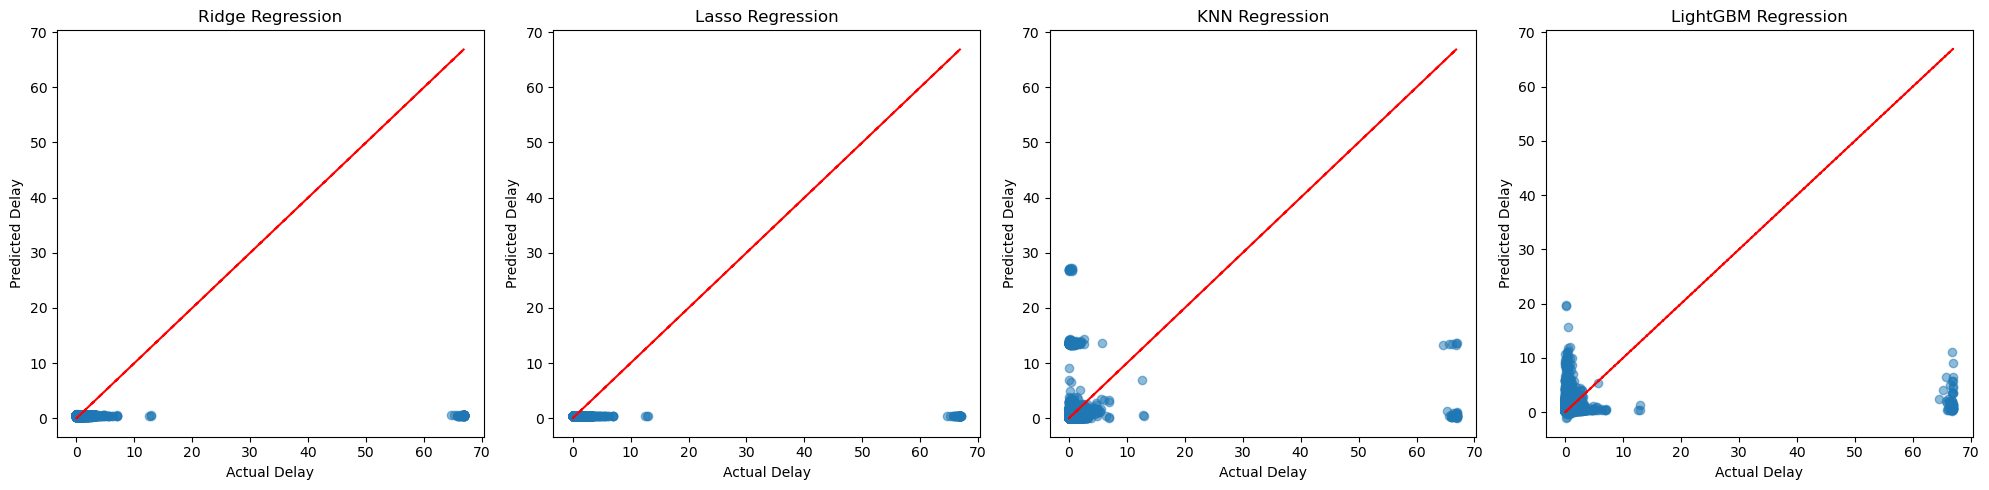

<Figure size 1000x500 with 0 Axes>

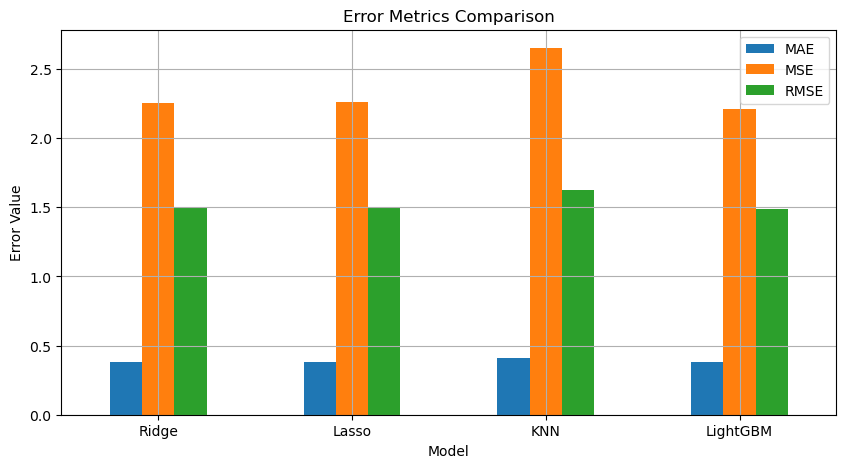

In [197]:
import numpy as np
import pandas as pd
import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Split features & target
X = df_sampled.drop(columns=['Delay'])
y = df_sampled['Delay']

# Train-test split (80-20)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_valid_scaled = scaler_X.transform(X_valid)

# Standardize target variable
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.to_numpy().reshape(-1, 1)).flatten()
y_valid_scaled = scaler_y.transform(y_valid.to_numpy().reshape(-1, 1)).flatten()

# Initialize models
ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.1)
lgb_model = lgb.LGBMRegressor()
knn = KNeighborsRegressor(n_neighbors=5)  # Using K=5

# Train models
ridge.fit(X_train_scaled, y_train_scaled)
lasso.fit(X_train_scaled, y_train_scaled)
lgb_model.fit(X_train, y_train)  # LightGBM does not require scaling
knn.fit(X_train_scaled, y_train_scaled)

# Predict on the validation set
ridge_preds_scaled = ridge.predict(X_valid_scaled)
lasso_preds_scaled = lasso.predict(X_valid_scaled)
knn_preds_scaled = knn.predict(X_valid_scaled)
lgb_preds = lgb_model.predict(X_valid)

# Convert predictions back to original scale
ridge_preds_original = scaler_y.inverse_transform(ridge_preds_scaled.reshape(-1, 1)).flatten()
lasso_preds_original = scaler_y.inverse_transform(lasso_preds_scaled.reshape(-1, 1)).flatten()
knn_preds_original = scaler_y.inverse_transform(knn_preds_scaled.reshape(-1, 1)).flatten()

# Compute errors
models = {
    "Ridge": ridge_preds_original,
    "Lasso": lasso_preds_original,
    "KNN": knn_preds_original,
    "LightGBM": lgb_preds
}

errors = {
    "Model": [],
    "MAE": [],
    "MSE": [],
    "RMSE": []
}

# Evaluate models
for model_name, preds in models.items():
    mae = mean_absolute_error(y_valid, preds)
    mse = mean_squared_error(y_valid, preds)
    rmse = np.sqrt(mse)

    errors["Model"].append(model_name)
    errors["MAE"].append(mae)
    errors["MSE"].append(mse)
    errors["RMSE"].append(rmse)

    print(f"\n{model_name} Performance:")
    print(f"Mean Absolute Error: {mae:.4f}")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"Root Mean Squared Error: {rmse:.4f}")

# Convert errors to DataFrame
errors_df = pd.DataFrame(errors)

# Plot actual vs predicted for each model
plt.figure(figsize=(20, 5))
for i, (model_name, preds) in enumerate(models.items()):
    plt.subplot(1, 4, i + 1)
    plt.scatter(y_valid, preds, alpha=0.5)
    plt.plot(y_valid, y_valid, color='red', linestyle='dashed')  # Perfect prediction line
    plt.xlabel("Actual Delay")
    plt.ylabel("Predicted Delay")
    plt.title(f"{model_name} Regression")
plt.tight_layout()
plt.show()

# Plot error metrics
plt.figure(figsize=(10, 5))
errors_df.set_index("Model").plot(kind="bar", figsize=(10, 5))
plt.title("Error Metrics Comparison")
plt.ylabel("Error Value")
plt.xticks(rotation=0)
plt.legend(["MAE", "MSE", "RMSE"])
plt.grid()
plt.show()


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010034 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2018
[LightGBM] [Info] Number of data points in the train set: 354152, number of used features: 16
[LightGBM] [Info] Start training from score 0.456124
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.017261 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2018
[LightGBM] [Info] Number of data points in the train set: 354153, number of used features: 16
[LightGBM] [Info] Start training from score 0.456578
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM]

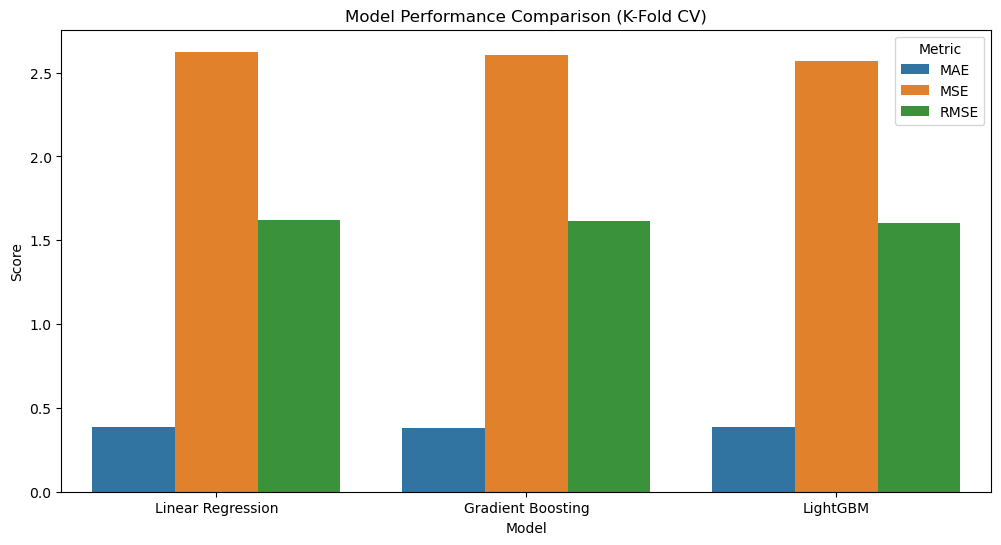

               Model       MAE       MSE      RMSE
0  Linear Regression  0.388524  2.624688  1.620089
1  Gradient Boosting  0.382701  2.605679  1.614212
2           LightGBM  0.385456  2.569986  1.603118


In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Split features & target
X = df_sampled.drop(columns=['Delay'])
y = df_sampled['Delay']

# Train-test split (80-20)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features (LightGBM & Gradient Boosting don't need scaling, but Linear Regression does)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    "LightGBM": lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

# Perform K-Fold Cross-Validation & Store Results
kf = KFold(n_splits=5, shuffle=True, random_state=42)
results = []

for name, model in models.items():
    scores = cross_val_score(model, X_train_scaled if name == "Linear Regression" else X_train, y_train, cv=kf, scoring='neg_mean_absolute_error')
    mae = -np.mean(scores)
    
    scores_mse = cross_val_score(model, X_train_scaled if name == "Linear Regression" else X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
    mse = -np.mean(scores_mse)
    rmse = np.sqrt(mse)
    
    results.append({"Model": name, "MAE": mae, "MSE": mse, "RMSE": rmse})

# Convert results to DataFrame
metrics_df = pd.DataFrame(results)

# --- Plot Metrics ---
plt.figure(figsize=(12, 6))
sns.barplot(data=metrics_df.melt(id_vars="Model", var_name="Metric", value_name="Score"), x="Model", y="Score", hue="Metric")
plt.title("Model Performance Comparison (K-Fold CV)")
plt.xlabel("Model")
plt.ylabel("Score")
plt.legend(title="Metric")
plt.show()

# Save metrics to CSV
metrics_df.to_csv("model_metrics.csv", index=False)

# Print results
print(metrics_df)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
import lightgbm as lgb
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Split features & target
X = df_sampled.drop(columns=['Delay'])
y = df_sampled['Delay']

# Train-test split (80-20)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features (needed for Linear Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    "LightGBM": lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    "CatBoost": CatBoostRegressor(iterations=1000, depth=10, learning_rate=0.05, loss_function='RMSE', verbose=200)
}

# Store results
results = []

# Train & Evaluate Each Model
for name, model in models.items():
    if name == "Linear Regression":
        model.fit(X_train_scaled, y_train)
        predictions = model.predict(X_valid_scaled)
    else:
        model.fit(X_train, y_train)
        predictions = model.predict(X_valid)

    mae = mean_absolute_error(y_valid, predictions)
    mse = mean_squared_error(y_valid, predictions)
    rmse = np.sqrt(mse)

    results.append({"Model": name, "MAE": mae, "MSE": mse, "RMSE": rmse})

# Convert results to DataFrame
metrics_df = pd.DataFrame(results)

# --- Plot Metrics ---
plt.figure(figsize=(12, 6))
sns.barplot(data=metrics_df.melt(id_vars="Model", var_name="Metric", value_name="Score"), x="Model", y="Score", hue="Metric")
plt.title("Model Performance Comparison (Train-Test Split)")
plt.xlabel("Model")
plt.ylabel("Score")
plt.legend(title="Metric")
plt.show()

# Save metrics to CSV
metrics_df.to_csv("model_metrics_no_cv.csv", index=False)

# Print results
print(metrics_df)


# catboost

In [145]:
import numpy as np
import pandas as pd
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Split features & target
X = df_sampled.drop(columns=['Delay'])
y = df_sampled['Delay']

# Train-test split (80-20)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_valid_scaled = scaler_X.transform(X_valid)

# Standardize target variable (Delay)
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.to_numpy().reshape(-1, 1)).flatten()
y_valid_scaled = scaler_y.transform(y_valid.to_numpy().reshape(-1, 1)).flatten()

# Initialize CatBoostRegressor model
model = CatBoostRegressor(iterations=1000, depth=10, learning_rate=0.05, loss_function='RMSE', verbose=200)

# Train the model
model.fit(X_train_scaled, y_train_scaled)

# Predict on the validation set (scaled predictions)
catboost_preds_scaled = model.predict(X_valid_scaled)

# Convert predictions back to original scale
catboost_preds_original = scaler_y.inverse_transform(catboost_preds_scaled.reshape(-1, 1)).flatten()
y_valid_original = scaler_y.inverse_transform(y_valid_scaled.reshape(-1, 1)).flatten()

# Create DataFrame for comparison
comparison_df = pd.DataFrame({'Actual': y_valid_original, 'Predicted': catboost_preds_original})

# Display first 10 rows of actual vs predicted
print(comparison_df.head(10))

# Evaluate final model error
mae = mean_absolute_error(y_valid_original, catboost_preds_original)
mse = mean_squared_error(y_valid_original, catboost_preds_original)

# Display errors
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")


0:	learn: 0.9996901	total: 231ms	remaining: 3m 50s
200:	learn: 0.9453365	total: 12.2s	remaining: 48.4s
400:	learn: 0.9090813	total: 24.3s	remaining: 36.3s
600:	learn: 0.8841532	total: 36.3s	remaining: 24.1s
800:	learn: 0.8588927	total: 51.3s	remaining: 12.8s
999:	learn: 0.8370510	total: 1m 5s	remaining: 0us
     Actual  Predicted
0  0.662822   0.484482
1  0.166220   0.422896
2  0.090718   0.330604
3  0.202804   0.374908
4  0.112512   0.231438
5  0.257290   0.278941
6  0.553072   0.233545
7  0.378716   0.551880
8  0.360813   0.162787
9  0.233160   0.389938
Mean Absolute Error: 0.37289851237919996
Mean Squared Error: 2.212888008499157


In [24]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Split features & target
X = df_sampled.drop(columns=['Delay'])
y = df_sampled['Delay']

# Train-test split (80-20)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_valid_scaled = scaler_X.transform(X_valid)

# Standardize target variable (Delay) before training
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.to_numpy().reshape(-1, 1)).flatten()
y_valid_scaled = scaler_y.transform(y_valid.to_numpy().reshape(-1, 1)).flatten()

# Reshape data for RNN (samples, timesteps, features)
X_train_rnn = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_valid_rnn = X_valid_scaled.reshape(X_valid_scaled.shape[0], 1, X_valid_scaled.shape[1])

# Initialize the RNN model
model_rnn = Sequential()
model_rnn.add(SimpleRNN(64, activation='relu', input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])))
model_rnn.add(Dense(1))

# Compile and train the model
model_rnn.compile(optimizer='adam', loss='mse', metrics=['mae'])
model_rnn.fit(X_train_rnn, y_train_scaled, epochs=20, batch_size=128, verbose=1)

# Predict on the validation set (scaled predictions)
rnn_preds_scaled = model_rnn.predict(X_valid_rnn).flatten()

# Convert predictions back to original scale
rnn_preds_original = scaler_y.inverse_transform(rnn_preds_scaled.reshape(-1, 1)).flatten()
y_valid_original = scaler_y.inverse_transform(y_valid_scaled.reshape(-1, 1)).flatten()

# Evaluate final model error
mae = mean_absolute_error(y_valid_original, rnn_preds_original)
mse = mean_squared_error(y_valid_original, rnn_preds_original)
rmse = np.sqrt(mse)

print(f"RNN - MAE: {mae}, MSE: {mse}, RMSE: {rmse}")


Epoch 1/20


C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3459/3459 ━━━━━━━━━━━━━━━━━━━━ 4s 858us/step - loss: 1.1017 - mae: 0.2683
Epoch 2/20
3459/3459 ━━━━━━━━━━━━━━━━━━━━ 3s 856us/step - loss: 1.0083 - mae: 0.2431
Epoch 3/20
3459/3459 ━━━━━━━━━━━━━━━━━━━━ 3s 975us/step - loss: 0.9843 - mae: 0.2410
Epoch 4/20
3459/3459 ━━━━━━━━━━━━━━━━━━━━ 3s 916us/step - loss: 0.9252 - mae: 0.2369
Epoch 5/20
3459/3459 ━━━━━━━━━━━━━━━━━━━━ 3s 979us/step - loss: 0.9725 - mae: 0.2389
Epoch 6/20
3459/3459 ━━━━━━━━━━━━━━━━━━━━ 3s 946us/step - loss: 0.9753 - mae: 0.2390
Epoch 7/20
3459/3459 ━━━━━━━━━━━━━━━━━━━━ 3s 958us/step - loss: 1.0066 - mae: 0.2393
Epoch 8/20
3459/3459 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.9137 - mae: 0.2360
Epoch 9/20
3459/3459 ━━━━━━━━━━━━━━━━━━━━ 3s 925us/step - loss: 0.9322 - mae: 0.2371
Epoch 10/20
3459/3459 ━━━━━━━━━━━━━━━━━━━━ 3s 932us/step - loss: 1.0243 - mae: 0.2394
Epoch 11/20
3459/3459 ━━━━━━━━━━━━━━━━━━━━ 3s 926us/step - loss: 1.0156 - mae: 0.2391
Epoch 12/20
3459/3459 ━━━━━━━━━━━━━━━━━━━━ 3s 989us/step - loss: 0.9551 - ma

In [30]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, SimpleRNN, Attention, Add, LayerNormalization, Dense

# Split features & target
X = df_sampled.drop(columns=['Delay'])
y = df_sampled['Delay']

# Train-test split (80-20)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_valid_scaled = scaler_X.transform(X_valid)

# Standardize target variable (Delay) before training
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.to_numpy().reshape(-1, 1)).flatten()
y_valid_scaled = scaler_y.transform(y_valid.to_numpy().reshape(-1, 1)).flatten()

# Reshape data for RNN (samples, timesteps, features)
X_train_rnn = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_valid_rnn = X_valid_scaled.reshape(X_valid_scaled.shape[0], 1, X_valid_scaled.shape[1])

# Define a model with an attention mechanism
def create_attention_model():
    inputs = Input(shape=(X_train_rnn.shape[1], X_train_rnn.shape[2]))
    
    # RNN Layer
    rnn_output = SimpleRNN(64, activation='relu', return_sequences=True)(inputs)
    
    # Attention mechanism
    attention_output = Attention()([rnn_output, rnn_output])  # Query and value are both the RNN output
    
    # Add a residual connection and normalization
    added_output = Add()([rnn_output, attention_output])
    normalized_output = LayerNormalization()(added_output)
    
    # Output Layer
    output = Dense(1)(normalized_output)
    
    # Define and compile the model
    model = Model(inputs=inputs, outputs=output)
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    
    return model

# Initialize and train the attention model
model_attention = create_attention_model()
model_attention.fit(X_train_rnn, y_train_scaled, epochs=20, batch_size=128, verbose=1)

# Predict on the validation set (scaled predictions)
attention_preds_scaled = model_attention.predict(X_valid_rnn).flatten()

# Convert predictions back to original scale
attention_preds_original = scaler_y.inverse_transform(attention_preds_scaled.reshape(-1, 1)).flatten()
y_valid_original = scaler_y.inverse_transform(y_valid_scaled.reshape(-1, 1)).flatten()

# Evaluate final model error
mae = mean_absolute_error(y_valid_original, attention_preds_original)
mse = mean_squared_error(y_valid_original, attention_preds_original)
rmse = np.sqrt(mse)

print(f"Attention Model - MAE: {mae}, MSE: {mse}, RMSE: {rmse}")


Epoch 1/20


C:\Users\User\anaconda3\Lib\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


3459/3459 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 1.0479 - mae: 0.3034
Epoch 2/20
3459/3459 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 1.0034 - mae: 0.2403
Epoch 3/20
3459/3459 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.9384 - mae: 0.2374
Epoch 4/20
3459/3459 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 1.0317 - mae: 0.2406
Epoch 5/20
3459/3459 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 1.0686 - mae: 0.2428
Epoch 6/20
3459/3459 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 1.0158 - mae: 0.2401
Epoch 7/20
3459/3459 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 1.0127 - mae: 0.2407
Epoch 8/20
3459/3459 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.9526 - mae: 0.2381
Epoch 9/20
3459/3459 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.9114 - mae: 0.2369
Epoch 10/20
3459/3459 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.9740 - mae: 0.2390
Epoch 11/20
3459/3459 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 1.0117 - mae: 0.2404
Epoch 12/20
3459/3459 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.9101 - mae: 0.2374
Epoch 13/20


C:\Users\User\anaconda3\Lib\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


3459/3459 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
Attention Model - MAE: 0.38554220566800795, MSE: 2.25940883309253, RMSE: 1.5031330057890853


In [32]:
model_attention.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)    │ (None, 1, 16)             │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ simple_rnn_3 (SimpleRNN)      │ (None, 1, 64)             │           5,184 │ input_layer_2[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ attention_2 (Attention)       │ (None, 1, 64)             │               0 │ simple_rnn_3[0][0],        │
│                               │                           │                 │ simple_rnn_3[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ add_1 (Add)                   │ (None, 1, 64)             │               0 │ simple_rnn_3[0][0],        │
│                               │                           │                 │ attention_2[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ layer_normalization_1         │ (None, 1, 64)             │             128 │ add_1[0][0]                │
│ (LayerNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_2 (Dense)               │ (None, 1, 1)              │              65 │ layer_normalization_1[0][… │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 16,133 (63.02 KB)

 Trainable params: 5,377 (21.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 10,756 (42.02 KB)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam  # Add this line to import Adam optimizer

# Split features & target
X = df_sampled.drop(columns=['Delay'])
y = df_sampled['Delay']

# Train-test split (80-20)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_valid_scaled = scaler_X.transform(X_valid)

# Standardize target variable (Delay) before training
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.to_numpy().reshape(-1, 1)).flatten()
y_valid_scaled = scaler_y.transform(y_valid.to_numpy().reshape(-1, 1)).flatten()

# Reshape data for CNN (samples, timesteps, features)
X_train_cnn = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_valid_cnn = X_valid_scaled.reshape(X_valid_scaled.shape[0], X_valid_scaled.shape[1], 1)

# Define a CNN model with improvements
def create_improved_cnn_model():
    inputs = Input(shape=(X_train_cnn.shape[1], X_train_cnn.shape[2]))
    
    # 1st Convolutional Layer
    x = Conv1D(64, 3, activation='relu', kernel_regularizer=l2(0.01))(inputs)
    x = MaxPooling1D(2)(x)
    x = Dropout(0.2)(x)  # Dropout for regularization
    
    # 2nd Convolutional Layer
    x = Conv1D(128, 3, activation='relu', kernel_regularizer=l2(0.01))(x)
    x = MaxPooling1D(2)(x)
    x = Dropout(0.2)(x)  # Dropout for regularization
    
    # Flatten and Dense Layers
    x = Flatten()(x)
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.2)(x)  # Dropout for regularization
    
    # Output Layer
    output = Dense(1)(x)
    
    # Define and compile the model
    model = Model(inputs=inputs, outputs=output)
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    
    return model

# Learning rate adjustment: starting with a lower value
initial_lr = 1e-4

# Define optimizer with reduced learning rate
optimizer = Adam(learning_rate=initial_lr)

# Create model
model_cnn_improved = create_improved_cnn_model()

# Update the optimizer
model_cnn_improved.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Train the improved model with more epochs and early stopping
model_cnn_improved.fit(
    X_train_cnn, y_train_scaled, 
    epochs=100, 
    batch_size=64,  # Smaller batch size
    validation_data=(X_valid_cnn, y_valid_scaled),
    callbacks=[early_stopping, lr_scheduler], 
    verbose=1
)

# Predict on the validation set (scaled predictions)
cnn_improved_preds_scaled = model_cnn_improved.predict(X_valid_cnn).flatten()

# Convert predictions back to original scale
cnn_improved_preds_original = scaler_y.inverse_transform(cnn_improved_preds_scaled.reshape(-1, 1)).flatten()
y_valid_original = scaler_y.inverse_transform(y_valid_scaled.reshape(-1, 1)).flatten()

# Evaluate final model error
mae = mean_absolute_error(y_valid_original, cnn_improved_preds_original)
mse = mean_squared_error(y_valid_original, cnn_improved_preds_original)
rmse = np.sqrt(mse)

# Print evaluation results
print(f"Improved CNN Model - MAE: {mae}, MSE: {mse}, RMSE: {rmse}")

# Model summary
model_cnn_improved.summary()


# final codes 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import catboost

# Split features & target
X = df_sampled.drop(columns=['Delay'])
y = df_sampled['Delay']

# Train-test split (80-20)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

# Model list
models = {
    "Linear Regression": Ridge(),
    "Support Vector Machine (SVM)": SVR(),
    "K-Nearest Neighbors (KNN)": KNeighborsRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "CatBoost": catboost.CatBoostRegressor(learning_rate=0.1, iterations=100, depth=10, silent=True)
}

# Store metrics
metrics = {
    "Model": [],
    "MAE": [],
    "MSE": [],
    "RMSE": []
}

# Train models and evaluate
for name, model in models.items():
    # Fit the model
    model.fit(X_train_scaled, y_train)
    
    # Predict on the validation set
    y_pred = model.predict(X_valid_scaled)
    
    # Calculate metrics
    mae = mean_absolute_error(y_valid, y_pred)
    mse = mean_squared_error(y_valid, y_pred)
    rmse = np.sqrt(mse)
    
    # Save metrics
    metrics["Model"].append(name)
    metrics["MAE"].append(mae)
    metrics["MSE"].append(mse)
    metrics["RMSE"].append(rmse)

# Convert metrics to DataFrame
metrics_df = pd.DataFrame(metrics)

# Display metrics
print(metrics_df)

# Plot the metrics
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot MAE
axes[0].bar(metrics_df["Model"], metrics_df["MAE"], color='skyblue')
axes[0].set_title("Mean Absolute Error (MAE)")
axes[0].set_xlabel("Model")
axes[0].set_ylabel("MAE")

# Plot MSE
axes[1].bar(metrics_df["Model"], metrics_df["MSE"], color='lightgreen')
axes[1].set_title("Mean Squared Error (MSE)")
axes[1].set_xlabel("Model")
axes[1].set_ylabel("MSE")

# Plot RMSE
axes[2].bar(metrics_df["Model"], metrics_df["RMSE"], color='salmon')
axes[2].set_title("Root Mean Squared Error (RMSE)")
axes[2].set_xlabel("Model")
axes[2].set_ylabel("RMSE")

# Show plots
plt.tight_layout()
plt.show()



# catboost 

In [37]:
import numpy as np
import pandas as pd
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Split features & target
X = df_sampled.drop(columns=['Delay'])
y = df_sampled['Delay']

# Train-test split (80-20)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_valid_scaled = scaler_X.transform(X_valid)

# Standardize target variable (Delay)
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.to_numpy().reshape(-1, 1)).flatten()
y_valid_scaled = scaler_y.transform(y_valid.to_numpy().reshape(-1, 1)).flatten()

# Initialize CatBoostRegressor model
model = CatBoostRegressor(iterations=1000, depth=10, learning_rate=0.05, loss_function='RMSE', verbose=200)

# Train the model
model.fit(X_train_scaled, y_train_scaled)

# Predict on the validation set (scaled predictions)
catboost_preds_scaled = model.predict(X_valid_scaled)

# Convert predictions back to original scale
catboost_preds_original = scaler_y.inverse_transform(catboost_preds_scaled.reshape(-1, 1)).flatten()
y_valid_original = scaler_y.inverse_transform(y_valid_scaled.reshape(-1, 1)).flatten()

# Create DataFrame for comparison
comparison_df = pd.DataFrame({'Actual': y_valid_original, 'Predicted': catboost_preds_original})

# Display first 10 rows of actual vs predicted
print(comparison_df.head(10))

# Evaluate final model error
mae = mean_absolute_error(y_valid_original, catboost_preds_original)
mse = mean_squared_error(y_valid_original, catboost_preds_original)

# Display errors
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")


0:	learn: 0.9996901	total: 58.3ms	remaining: 58.3s
200:	learn: 0.9453365	total: 12.1s	remaining: 48.1s
400:	learn: 0.9090813	total: 25s	remaining: 37.3s
600:	learn: 0.8841532	total: 36s	remaining: 23.9s
800:	learn: 0.8588927	total: 49.2s	remaining: 12.2s
999:	learn: 0.8370510	total: 1m 2s	remaining: 0us
     Actual  Predicted
0  0.663030   0.484657
1  0.166337   0.423060
2  0.090821   0.330751
3  0.202927   0.375064
4  0.112620   0.231568
5  0.257424   0.279079
6  0.553260   0.233675
7  0.378872   0.552068
8  0.360966   0.162903
9  0.233290   0.390096
Mean Absolute Error: 0.3729668035000734
Mean Squared Error: 2.2136986013830535


# DNN

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, GRU, Dropout
import statsmodels.api as sm
from tensorflow.keras.optimizers import Adam

# Split features & target
X = df_sampled.drop(columns=['Delay'])
y = df_sampled['Delay']

# Train-test split (80-20)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

# Model metrics storage
metrics = {
    "Model": [],
    "MAE": [],
    "MSE": [],
    "RMSE": []
}

# ===============================================
# Artificial Neural Network (ANN) Model
# ===============================================
def create_ann_model():
    model = Sequential()
    model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=1e-4), loss='mse', metrics=['mae'])
    return model

# Train and evaluate ANN
ann_model = create_ann_model()
ann_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_valid_scaled, y_valid), verbose=0)
ann_preds = ann_model.predict(X_valid_scaled)
ann_mae = mean_absolute_error(y_valid, ann_preds)
ann_mse = mean_squared_error(y_valid, ann_preds)
ann_rmse = np.sqrt(ann_mse)
metrics["Model"].append("ANN")
metrics["MAE"].append(ann_mae)
metrics["MSE"].append(ann_mse)
metrics["RMSE"].append(ann_rmse)

# ===============================================
# Recurrent Neural Network (RNN) Model
# ===============================================
def create_rnn_model():
    model = Sequential()
    model.add(SimpleRNN(64, input_shape=(X_train_scaled.shape[1], 1), activation='relu', return_sequences=True))
    model.add(Dropout(0.2))
    model.add(SimpleRNN(32, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=1e-4), loss='mse', metrics=['mae'])
    return model

# Reshape for RNN input
X_train_rnn = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_valid_rnn = X_valid_scaled.reshape(X_valid_scaled.shape[0], X_valid_scaled.shape[1], 1)

# Train and evaluate RNN
rnn_model = create_rnn_model()
rnn_model.fit(X_train_rnn, y_train, epochs=50, batch_size=32, validation_data=(X_valid_rnn, y_valid), verbose=0)
rnn_preds = rnn_model.predict(X_valid_rnn)
rnn_mae = mean_absolute_error(y_valid, rnn_preds)
rnn_mse = mean_squared_error(y_valid, rnn_preds)
rnn_rmse = np.sqrt(rnn_mse)
metrics["Model"].append("RNN")
metrics["MAE"].append(rnn_mae)
metrics["MSE"].append(rnn_mse)
metrics["RMSE"].append(rnn_rmse)

# ===============================================
# Gated Recurrent Unit (GRU) Model
# ===============================================
def create_gru_model():
    model = Sequential()
    model.add(GRU(64, input_shape=(X_train_scaled.shape[1], 1), activation='relu', return_sequences=True))
    model.add(Dropout(0.2))
    model.add(GRU(32, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=1e-4), loss='mse', metrics=['mae'])
    return model

# Train and evaluate GRU
gru_model = create_gru_model()
gru_model.fit(X_train_rnn, y_train, epochs=50, batch_size=32, validation_data=(X_valid_rnn, y_valid), verbose=0)
gru_preds = gru_model.predict(X_valid_rnn)
gru_mae = mean_absolute_error(y_valid, gru_preds)
gru_mse = mean_squared_error(y_valid, gru_preds)
gru_rmse = np.sqrt(gru_mse)
metrics["Model"].append("GRU")
metrics["MAE"].append(gru_mae)
metrics["MSE"].append(gru_mse)
metrics["RMSE"].append(gru_rmse)

# ===============================================
# ARIMA Model
# ===============================================
# ARIMA requires a univariate time series, so we only use the 'Delay' target variable
y_train_arima = y_train.values
y_valid_arima = y_valid.values

# Fit ARIMA model (p=5, d=1, q=0 as an example, this can be tuned)
arima_model = sm.tsa.ARIMA(y_train_arima, order=(5,1,0))
arima_fitted = arima_model.fit()

# Predict using ARIMA model
arima_preds = arima_fitted.forecast(steps=len(y_valid_arima))
arima_mae = mean_absolute_error(y_valid_arima, arima_preds)
arima_mse = mean_squared_error(y_valid_arima, arima_preds)
arima_rmse = np.sqrt(arima_mse)
metrics["Model"].append("ARIMA")
metrics["MAE"].append(arima_mae)
metrics["MSE"].append(arima_mse)
metrics["RMSE"].append(arima_rmse)

# ===============================================
# Store and plot metrics
# ===============================================
metrics_df = pd.DataFrame(metrics)
print(metrics_df)

# Plot the metrics
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot MAE
axes[0].bar(metrics_df["Model"], metrics_df["MAE"], color='skyblue')
axes[0].set_title("Mean Absolute Error (MAE)")
axes[0].set_xlabel("Model")
axes[0].set_ylabel("MAE")

# Plot MSE
axes[1].bar(metrics_df["Model"], metrics_df["MSE"], color='lightgreen')
axes[1].set_title("Mean Squared Error (MSE)")
axes[1].set_xlabel("Model")
axes[1].set_ylabel("MSE")

# Plot RMSE
axes[2].bar(metrics_df["Model"], metrics_df["RMSE"], color='salmon')
axes[2].set_title("Root Mean Squared Error (RMSE)")
axes[2].set_xlabel("Model")
axes[2].set_ylabel("RMSE")

# Show plots
plt.tight_layout()
plt.show()



In [41]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Sample data format (assuming you have timestamps)
# Convert to time series format (hourly/daily aggregates)
time_series = df_sampled.groupby(pd.Grouper(key='Timestamp', freq='1H'))['Delay'].mean()

# Split temporally (no random splitting!)
train_size = int(len(time_series) * 0.8)
train, test = time_series[:train_size], time_series[train_size:]

# Differencing to achieve stationarity (if needed)
differenced = train.diff().dropna()

# Fit ARIMA model (parameters need tuning)
model = ARIMA(train, order=(2,1,2))  # (p,d,q) 
fitted_model = model.fit()

# Forecast
forecast_steps = len(test)
forecast = fitted_model.get_forecast(steps=forecast_steps)
predicted = forecast.predicted_mean

# Evaluate
mae = mean_absolute_error(test, predicted)
rmse = np.sqrt(mean_squared_error(test, predicted))

print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}")

KeyError: 'your_time_column'